---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch import nn

from time import time
from tqdm import tqdm

from sklearn.metrics import roc_auc_score, average_precision_score,auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, auc, precision_recall_curve
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.utils import shuffle

import pandas as pd
import os
import sys

seed = 1234
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

os.environ['CUDA_VISIBLE_DEVICES'] = '0'

device = torch.device('cuda' if (torch.cuda.is_available()) else 'cpu')
print('[INFO] -> Using Device: ', device)

from load_data import get_Bank 
from FGAN_MODEL import FenceGAN

[INFO] -> Using Device:  cuda


In [ ]:
def meanAUC_PRAUC(auc_list, pr_list, name, SPACE_AUC, SPACE_AUPRC):
    print('AUC:')
    print(auc_list)
    print('**************')
    print('PR AUC:')
    print(pr_list)
    print('**************')
    
    
    AUC_Frame = pd.DataFrame(auc_list, columns = [name])
    PR_AUC_Frame = pd.DataFrame(pr_list, columns = [name])
    
    AU_NAME = f'{name}.csv'
    
    AUC_Frame.to_csv(os.path.join(SPACE_AUC, AU_NAME), index=False)
    PR_AUC_Frame.to_csv(os.path.join(SPACE_AUPRC, AU_NAME), index=False)
    
    AUC_Frame = list(AUC_Frame[name])

    N = len(AUC_Frame)
    mean_auc = np.mean(AUC_Frame)
    std_auc = np.std(AUC_Frame)
    std_error = std_auc / (np.sqrt(N))

    ci = 1.96 * std_error
    lower_bound = mean_auc - ci
    upper_bound = mean_auc + ci
    
    print('AUC')
    print(f'{mean_auc:.2f} +/- {ci:.2f}')
    print(f'95% confidence level, average auc would be between {lower_bound:.2f} and {upper_bound:.2f}')
    print('**************')
    
    PR_AUC_Frame = list(PR_AUC_Frame[name])

    N = len(PR_AUC_Frame)
    mean_auc = np.mean(PR_AUC_Frame)
    std_auc = np.std(PR_AUC_Frame)
    std_error = std_auc / (np.sqrt(N))

    ci = 1.96 * std_error
    lower_bound = mean_auc - ci
    upper_bound = mean_auc + ci
    
    print('PR AUC')
    print(f'{mean_auc:.2f} +/- {ci:.2f}')
    print(f'95% confidence level, average auc would be between {lower_bound:.2f} and {upper_bound:.2f}')

In [ ]:
batch_size = 1024

BASE_PATH = '..'

DATASET_FILE = 'bank-additional-ful-nominal.arff'


SPACE_MODELS = './models'
SPACE_AUC = './auc'
SPACE_AUPRC = './auprc'

for n in (SPACE_MODELS, SPACE_AUC, SPACE_AUPRC):
    if not os.path.exists(n):
        os.mkdir(n)
        
DATASET = 'BANK'

PATH = os.path.join(BASE_PATH, 'Dataset', DATASET_FILE)

In [ ]:
dataset = get_Bank(PATH, seed, show=True)

36548 normal records, 4640 anormal records
We use 2321 anomalous records
-----------------------------------------------------------------------------------------
There are 26383 records in training set
Training set is composed by 26383 normal records and 0 abnormal records
-----------------------------------------------------------------------------------------
There are 3131 records in validation set
Validation set is composed by 2551 normal records and 580 abnormal records
-----------------------------------------------------------------------------------------
There are 9354 records in test set
Test set is composed by 7614 normal records and 1740 abnormal records


In [ ]:
nc = dataset['x_train'].shape[1]
z_dim = 32
gamma = 0.1
alpha = 0.5 
beta = 30 
_power = 2
v_freq = 4

g_objective_anneal = 1
repeat = 4 
baseline = 0.5

#### Mean AUC and standard deviation after seven runs

Iteration: 1
Epoch #1: Loss: 0.7334
[INFO] Starting training phase...
Epoch [400/400] | d_loss: 0.095 | g_loss: 3.104
[INFO] Training phase... Elapsed time: 187 seconds



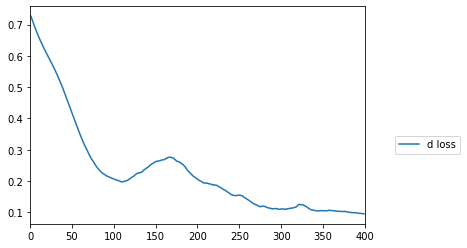

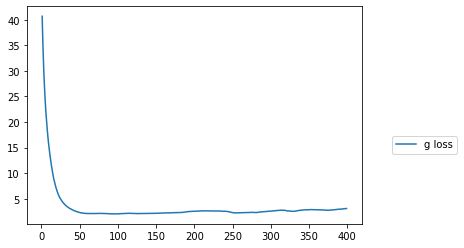

PR AUC: 0.26


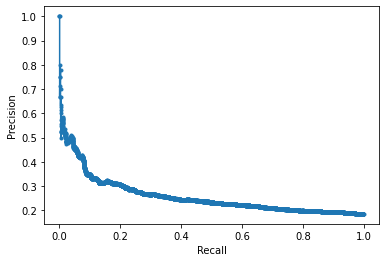

AUC: 0.58
Iteration: 2
Epoch #1: Loss: 0.7877
[INFO] Starting training phase...
Epoch [400/400] | d_loss: 0.093 | g_loss: 3.036
[INFO] Training phase... Elapsed time: 187 seconds



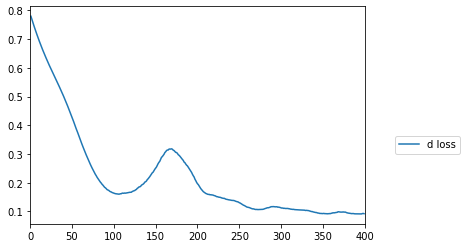

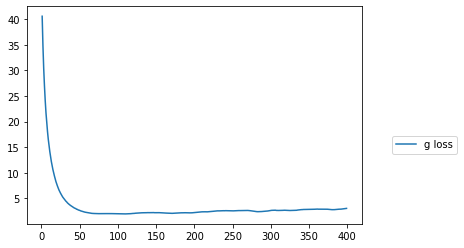

PR AUC: 0.23


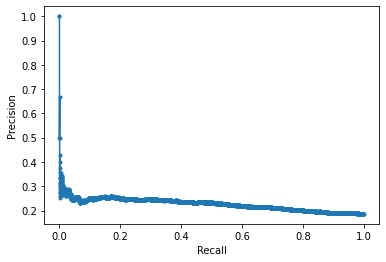

AUC: 0.57
Iteration: 3
Epoch #1: Loss: 0.7699
[INFO] Starting training phase...
Epoch [400/400] | d_loss: 0.092 | g_loss: 3.123
[INFO] Training phase... Elapsed time: 188 seconds



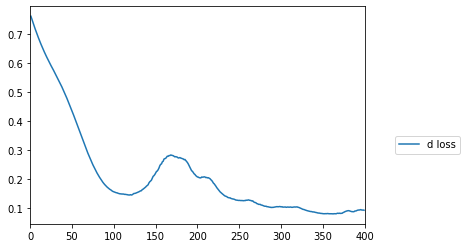

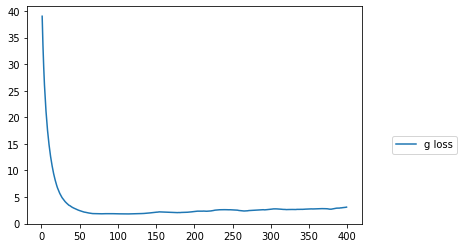

PR AUC: 0.24


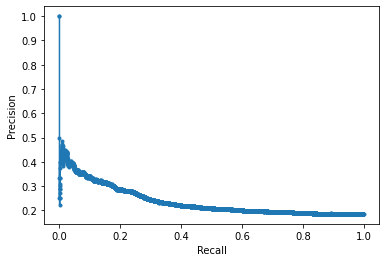

AUC: 0.55
Iteration: 4
Epoch #1: Loss: 0.7261
[INFO] Starting training phase...
Epoch [400/400] | d_loss: 0.090 | g_loss: 3.038
[INFO] Training phase... Elapsed time: 188 seconds



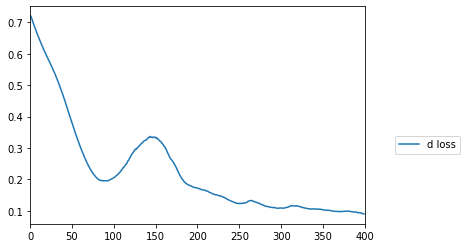

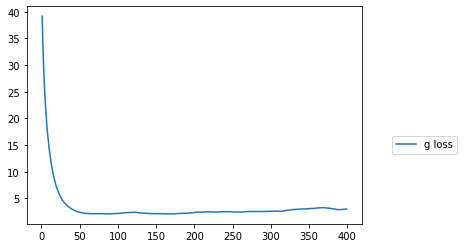

PR AUC: 0.31


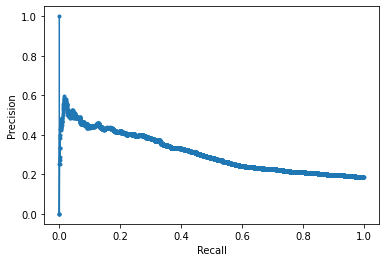

AUC: 0.63
Iteration: 5
Epoch #1: Loss: 0.7954
[INFO] Starting training phase...
Epoch [400/400] | d_loss: 0.098 | g_loss: 3.086
[INFO] Training phase... Elapsed time: 190 seconds



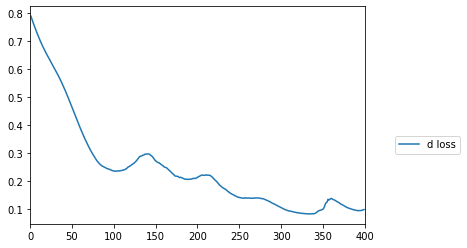

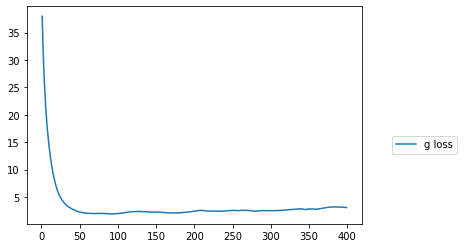

PR AUC: 0.24


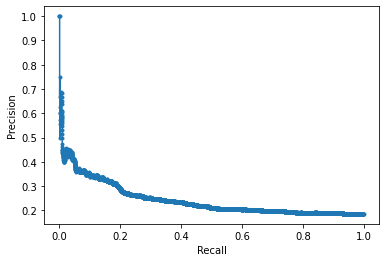

AUC: 0.56
Iteration: 6
Epoch #1: Loss: 0.7613
[INFO] Starting training phase...
Epoch [400/400] | d_loss: 0.094 | g_loss: 3.130
[INFO] Training phase... Elapsed time: 194 seconds



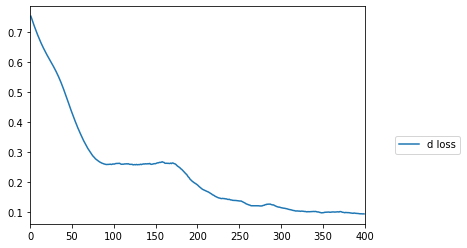

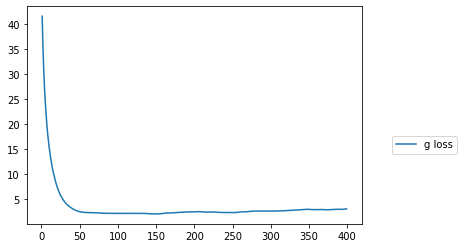

PR AUC: 0.21


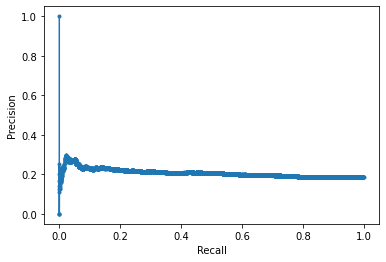

AUC: 0.53
Iteration: 7
Epoch #1: Loss: 0.7109
[INFO] Starting training phase...
Epoch [400/400] | d_loss: 0.088 | g_loss: 3.058
[INFO] Training phase... Elapsed time: 195 seconds



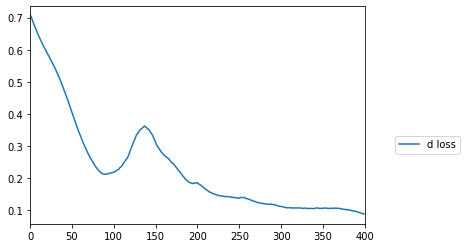

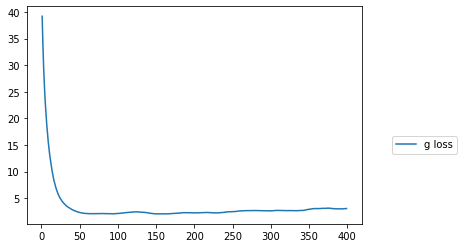

PR AUC: 0.22


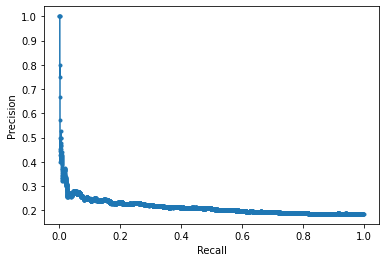

AUC: 0.53
Iteration: 8
Epoch #1: Loss: 0.7342
[INFO] Starting training phase...
Epoch [400/400] | d_loss: 0.099 | g_loss: 2.971
[INFO] Training phase... Elapsed time: 191 seconds



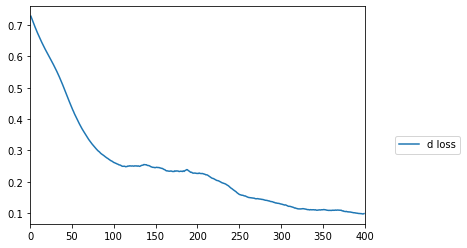

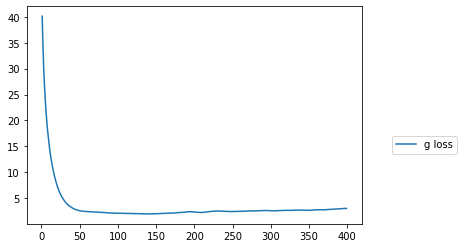

PR AUC: 0.22


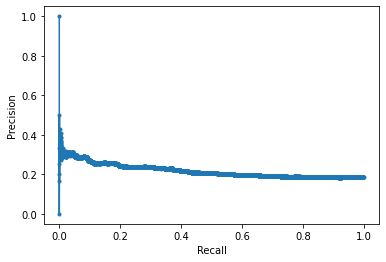

AUC: 0.54
Iteration: 9
Epoch #1: Loss: 0.7309
[INFO] Starting training phase...
Epoch [400/400] | d_loss: 0.092 | g_loss: 3.073
[INFO] Training phase... Elapsed time: 190 seconds



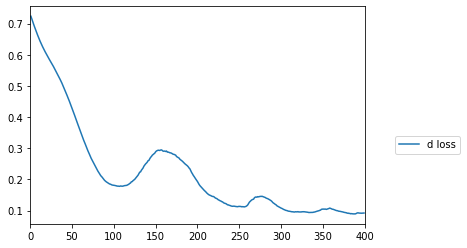

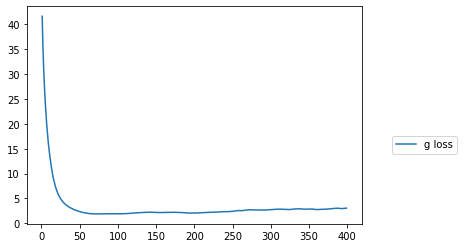

PR AUC: 0.21


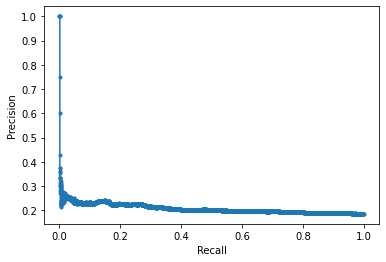

AUC: 0.54
Iteration: 10
Epoch #1: Loss: 0.7584
[INFO] Starting training phase...
Epoch [400/400] | d_loss: 0.094 | g_loss: 3.094
[INFO] Training phase... Elapsed time: 191 seconds



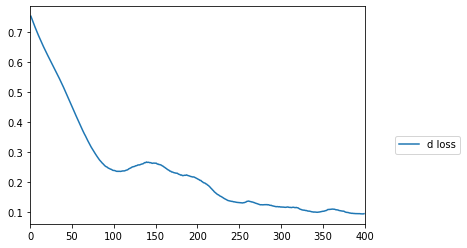

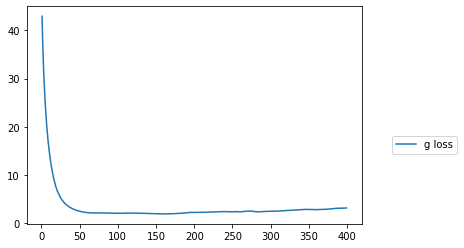

PR AUC: 0.25


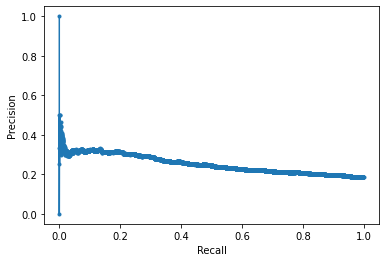

AUC: 0.60
Iteration: 11
Epoch #1: Loss: 0.8035
[INFO] Starting training phase...
Epoch [400/400] | d_loss: 0.093 | g_loss: 3.081
[INFO] Training phase... Elapsed time: 190 seconds



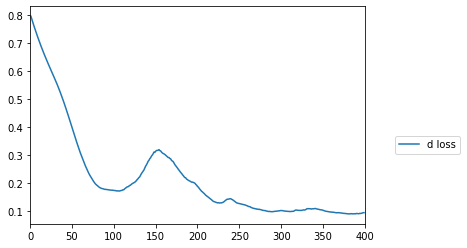

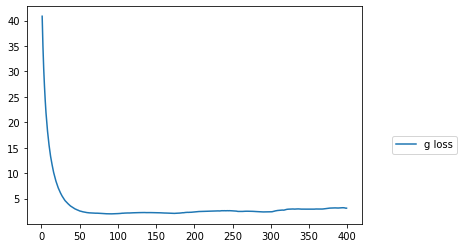

PR AUC: 0.25


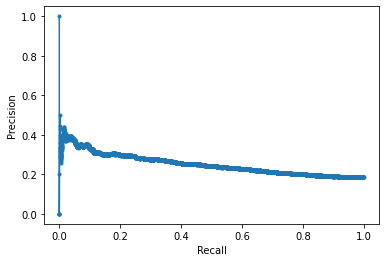

AUC: 0.59
Iteration: 12
Epoch #1: Loss: 0.7961
[INFO] Starting training phase...
Epoch [400/400] | d_loss: 0.106 | g_loss: 2.963
[INFO] Training phase... Elapsed time: 191 seconds



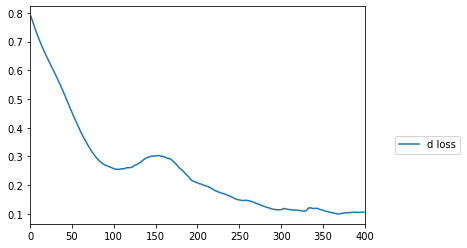

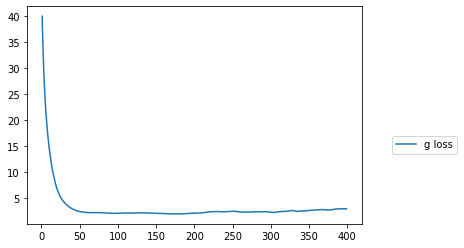

PR AUC: 0.23


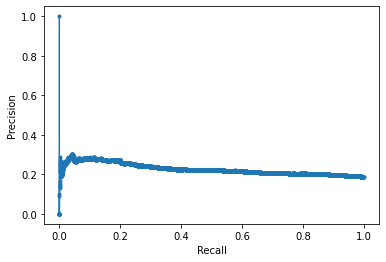

AUC: 0.57
Iteration: 13
Epoch #1: Loss: 0.7377
[INFO] Starting training phase...
Epoch [400/400] | d_loss: 0.082 | g_loss: 2.995
[INFO] Training phase... Elapsed time: 192 seconds



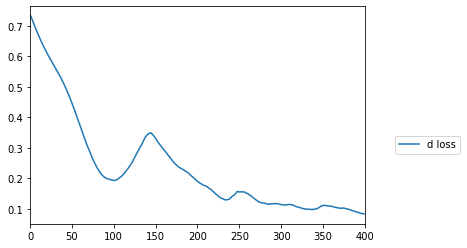

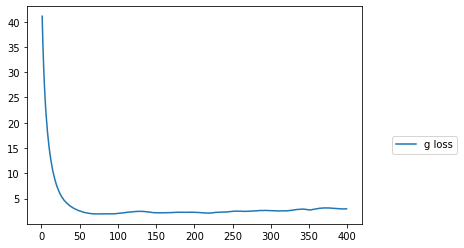

PR AUC: 0.20


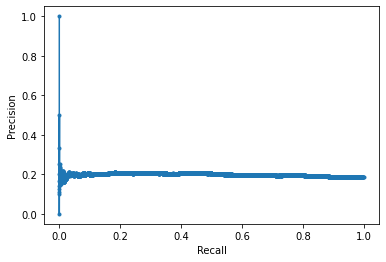

AUC: 0.53
Iteration: 14
Epoch #1: Loss: 0.7645
[INFO] Starting training phase...
Epoch [400/400] | d_loss: 0.097 | g_loss: 3.068
[INFO] Training phase... Elapsed time: 191 seconds



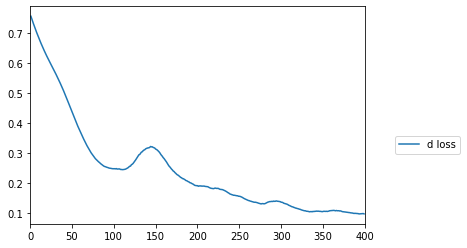

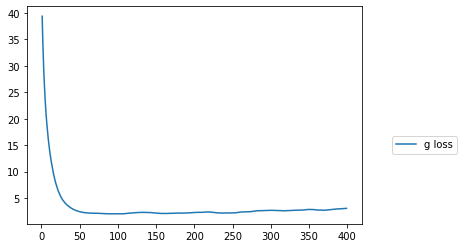

PR AUC: 0.22


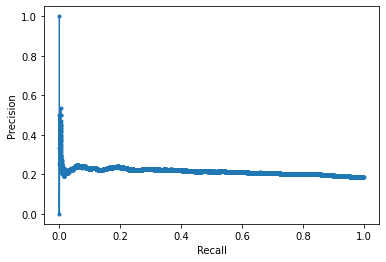

AUC: 0.56
Iteration: 15
Epoch #1: Loss: 0.7722
[INFO] Starting training phase...
Epoch [400/400] | d_loss: 0.090 | g_loss: 2.963
[INFO] Training phase... Elapsed time: 194 seconds



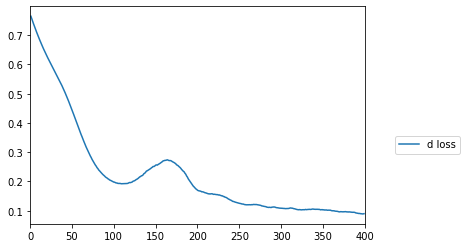

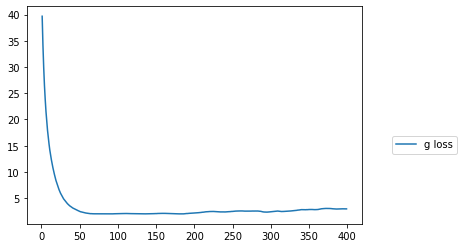

PR AUC: 0.24


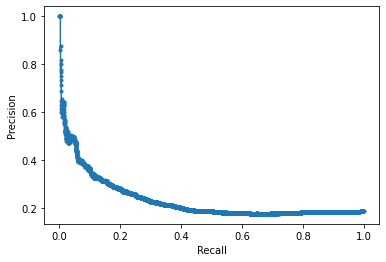

AUC: 0.51
Iteration: 16
Epoch #1: Loss: 0.7238
[INFO] Starting training phase...
Epoch [400/400] | d_loss: 0.095 | g_loss: 3.044
[INFO] Training phase... Elapsed time: 191 seconds



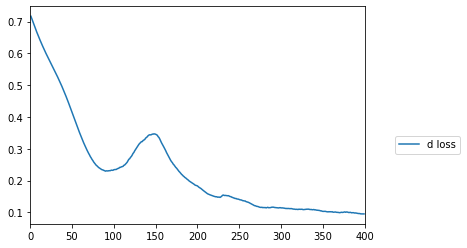

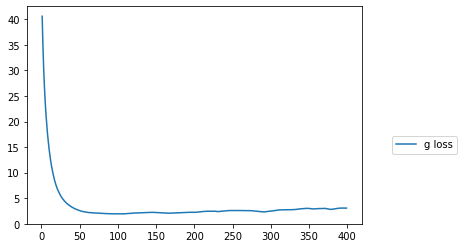

PR AUC: 0.25


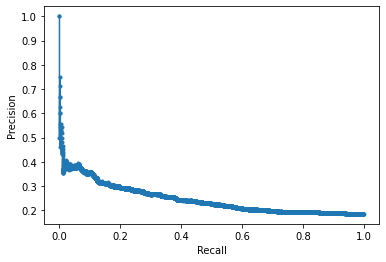

AUC: 0.57
Iteration: 17
Epoch #1: Loss: 0.7673
[INFO] Starting training phase...
Epoch [400/400] | d_loss: 0.100 | g_loss: 2.943
[INFO] Training phase... Elapsed time: 190 seconds



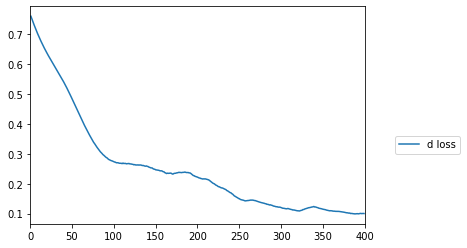

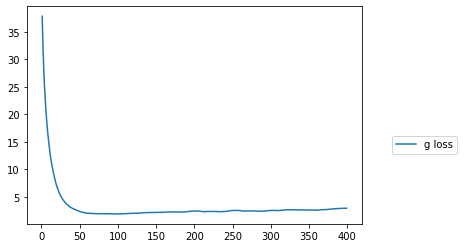

PR AUC: 0.20


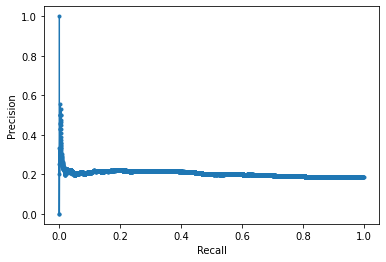

AUC: 0.53
Iteration: 18
Epoch #1: Loss: 0.7382
[INFO] Starting training phase...
Epoch [400/400] | d_loss: 0.105 | g_loss: 2.800
[INFO] Training phase... Elapsed time: 192 seconds



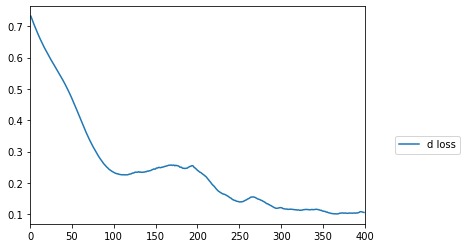

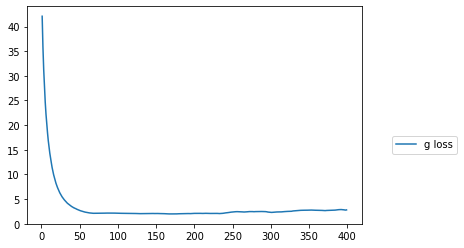

PR AUC: 0.22


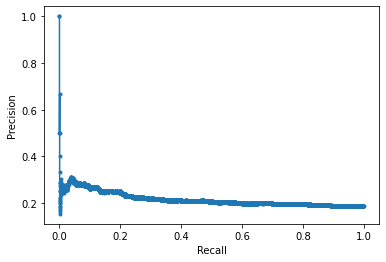

AUC: 0.54
Iteration: 19
Epoch #1: Loss: 0.7486
[INFO] Starting training phase...
Epoch [400/400] | d_loss: 0.100 | g_loss: 3.009
[INFO] Training phase... Elapsed time: 193 seconds



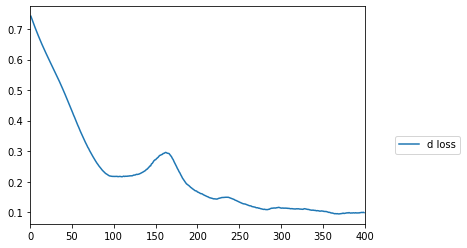

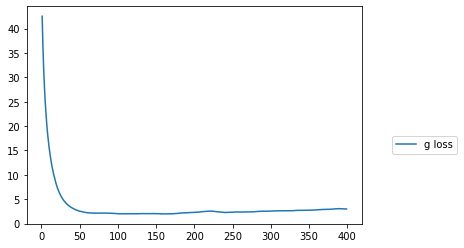

PR AUC: 0.25


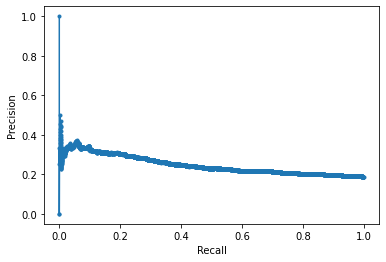

AUC: 0.59
Iteration: 20
Epoch #1: Loss: 0.7931
[INFO] Starting training phase...
Epoch [400/400] | d_loss: 0.095 | g_loss: 2.974
[INFO] Training phase... Elapsed time: 189 seconds



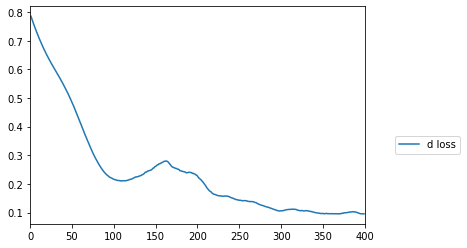

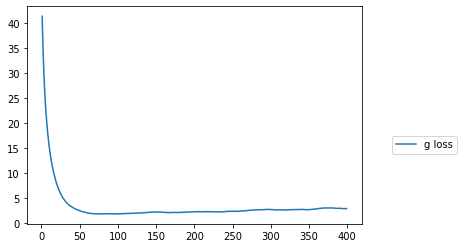

PR AUC: 0.22


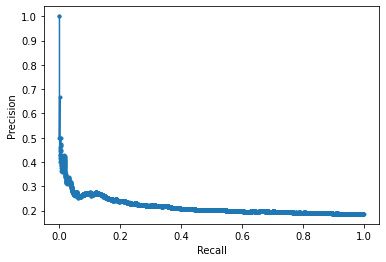

AUC: 0.54


In [ ]:
n_runs = 20
auc_list = []
n_epochs = 400
seed = 42
pr_list = []

for i in range(n_runs):
    print(f'Iteration: {i+1}')
    dataset = get_Bank(PATH, seed*(i+1), show=False)
    
    train_dataset = torch.utils.data.TensorDataset(torch.tensor(dataset['x_train']).to(device), 
                                              torch.tensor(dataset['y_train'].to_numpy()).to(device))
    
    train_loader = DataLoader(dataset=train_dataset, batch_size = batch_size, shuffle=True, drop_last = True)

    val_dataset = torch.utils.data.TensorDataset(torch.tensor(dataset['x_val']).to(device), 
                                              torch.tensor(dataset['y_val'].to_numpy()).to(device))
    val_loader = DataLoader(dataset=val_dataset, batch_size = batch_size, shuffle=False)

    test_dataset = torch.utils.data.TensorDataset(torch.tensor(dataset['x_test']).to(device), 
                                              torch.tensor(dataset['y_test'].to_numpy()).to(device))
    test_loader = DataLoader(dataset=test_dataset, batch_size = batch_size, shuffle=False)
    
    trainer = FenceGAN(nc, z_dim, gamma, alpha, beta, _power, v_freq, g_objective_anneal, repeat, baseline, device)
    
    d_losses, g_losses = trainer.train(train_loader, test_loader, val_loader, batch_size, n_epochs)
    
    # Save models
    NAME_D = f'D_FGAN_{DATASET}_{i}.ckpt'
    NAME_G = f'G_FGAN_{DATASET}_{i}.ckpt'
    
    torch.save(trainer.D.state_dict(), os.path.join(SPACE_MODELS, NAME_D))
    torch.save(trainer.G.state_dict(), os.path.join(SPACE_MODELS, NAME_G))
    
    _auc, pr_auc = trainer.predict(test_loader)
    print(f'AUC: {_auc:.2f}')
    auc_list.append(_auc)
    pr_list.append(pr_auc)

In [ ]:
meanAUC_PRAUC(auc_list, pr_list, f'FGAN_{DATASET}', SPACE_AUC, SPACE_AUPRC)

AUC:
[0.5849208505807512, 0.5726744291368895, 0.5478253534777136, 0.6330958699793786, 0.555937942507601, 0.5338509068292226, 0.5346858026200979, 0.537750181909308, 0.535953884103391, 0.5981626027674369, 0.5888246167827565, 0.5736165080055192, 0.5309383199128044, 0.5602459474229263, 0.5124729023063987, 0.5678295275792626, 0.5334982594072022, 0.5447266680555178, 0.590126551512791, 0.5385312974587043]
**************
PR AUC:
[0.26005759155821717, 0.22705980944745335, 0.23686011210625024, 0.30817846911488905, 0.24426562732671003, 0.20772406776151067, 0.21522759226683927, 0.21869595910548184, 0.20923474559923208, 0.25238454129980714, 0.25152248906492447, 0.2274554939407595, 0.19888776309435113, 0.21553685533389727, 0.2357737269723026, 0.24768053758100594, 0.20493508779172176, 0.21692224500375137, 0.24781517415888787, 0.2181806555923813]
**************
AUC
0.56 +/- 0.01
95% confidence level, average auc would be between 0.55 and 0.57
**************
PR AUC
0.23 +/- 0.01
95% confidence level, a

---